# imports

In [78]:
import sys
from os.path import join
import numpy as np
import pandas as pd
import torch
from glob import glob
import matplotlib.pyplot as plt

from cytoself.datamanager.opencell import DataManagerOpenCell
from cytoself.trainer.cytoselflite_trainer import CytoselfFullTrainer
from cytoself.analysis.analysis_opencell import AnalysisOpenCell
from cytoself.trainer.utils.plot_history import plot_history_cytoself

# dataloading

In [79]:
data_ch = ['pro', 'nuc', 'dist', 'seg']
datapath = "c:\\Users\\amulya\\Documents\\opencell_full_data\\"  # path to download sample data
datamanager = DataManagerOpenCell(datapath, data_ch, fov_col=None)
datamanager.determine_load_paths()

,label


In [85]:
images = []
labels = []
for f in glob(datapath + "*"):
    if "image" in f:
        images.append(np.load(f,allow_pickle=False))
    else:
        print(f)
        l = pd.read_csv(f)
        labels.append(l)
        print(np.shape(l))

images = np.concatenate(images[0:10])
np.savez("Y:\\users\\Amulya\\cytoself_all_images.npz", images)
labels = pd.concat(labels)
print(np.shape(labels))
labels.to_csv("C:\\Users\\amulya\\Downloads\\cytoself_all_labels.csv")

c:\Users\amulya\Documents\opencell_full_data\label_data00.csv
(134304, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data01.csv
(113780, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data02.csv


C:\Users\amulya\AppData\Local\Temp\ipykernel_34792\2013585442.py:9: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  l = pd.read_csv(f)


(147519, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data03.csv
(116838, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data04.csv
(107011, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data05.csv
(128691, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data06.csv
(113936, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data07.csv
(98588, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data08.csv
(103408, 7)
c:\Users\amulya\Documents\opencell_full_data\label_data09.csv
(70517, 7)
(1134592, 7)


Relevant:
https://github.com/royerlab/cytoself/issues/27
https://github.com/royerlab/cytoself/issues/23
https://github.com/sofroniewn/proteoscope/blob/main/notebooks/cytoself.ipynb

In [4]:
# DataManagerOpenCell.download_sample_data(datapath)  # donwload data
datamanager = DataManagerOpenCell(datapath, data_ch, fov_col=None)
datamanager.const_dataloader(batch_size=32, label_name_position=1)

Loading pro data...


0it [00:00, ?it/s]


IndexError: list index out of range

In [39]:
import glob
glob.glob("c:\\Users\\amulya\\Documents\\opencell_full_data\\*")

['c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data00.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data01.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data02.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data03.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data04.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data05.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data06.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data07.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data08.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\image_data09.npy',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\label_data00.csv',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\label_data01.csv',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\label_data02.csv',
 'c:\\Users\\amulya\\Documents\\opencell_full_data\\label_data03.csv',
 'c:\\

[ 0. 23.  0.]


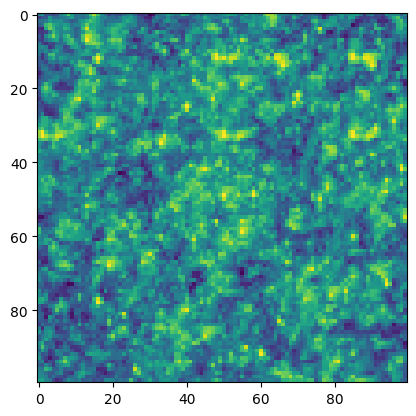

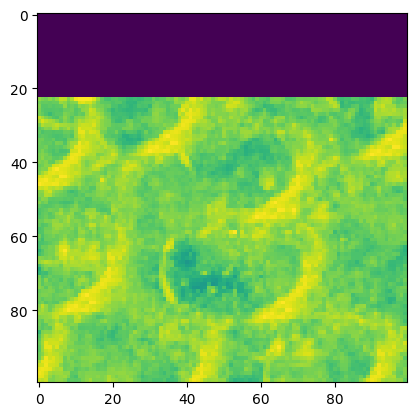

[  0.   0. -22.]


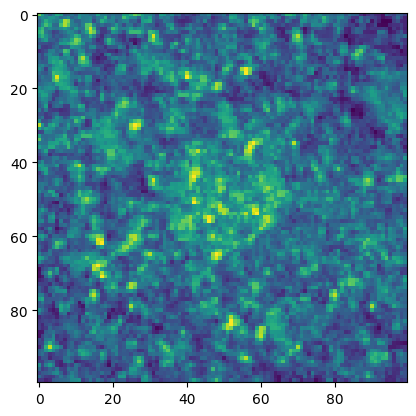

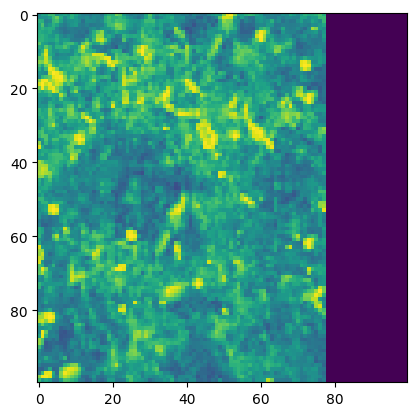

[  0.   8. -24.]


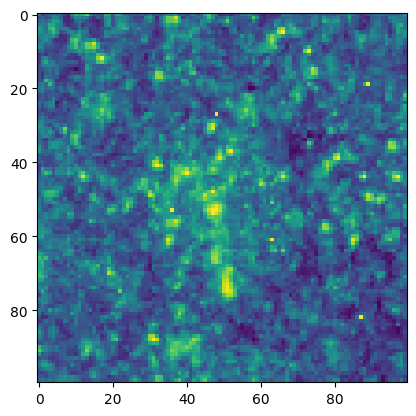

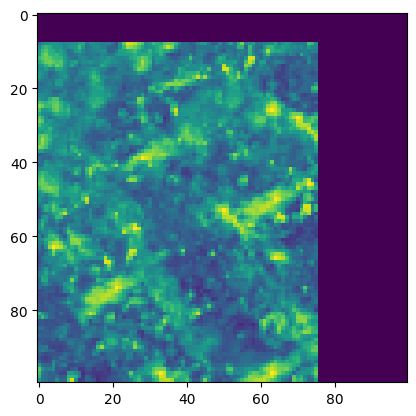

[0. 0. 0.]


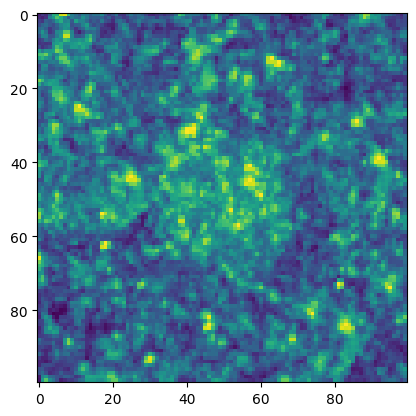

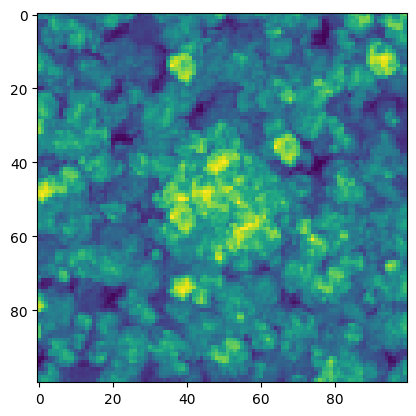

[0. 0. 0.]


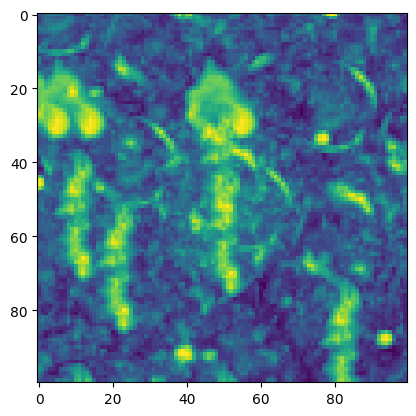

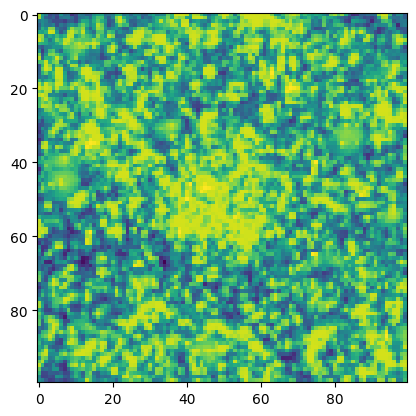

[77. 24. -8.]


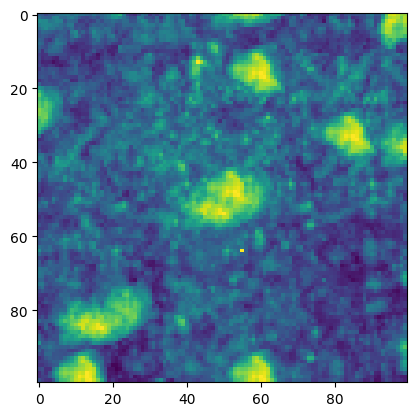

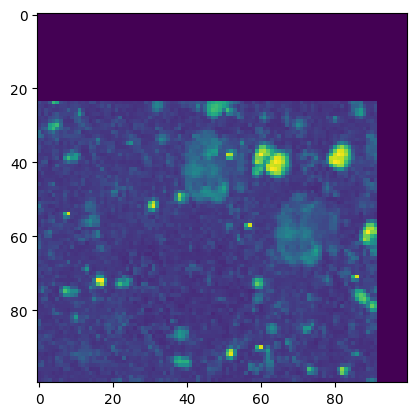

[0. 0. 0.]


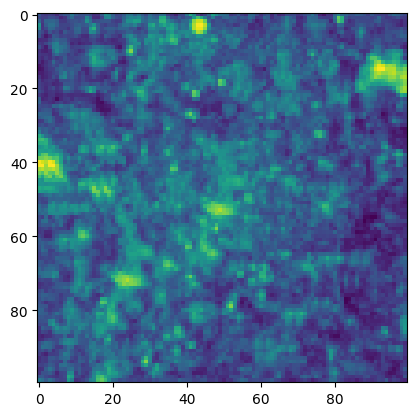

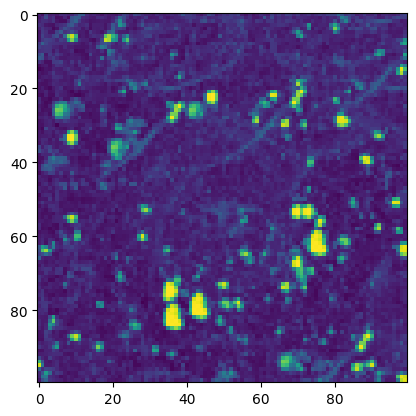

[0. 0. 0.]


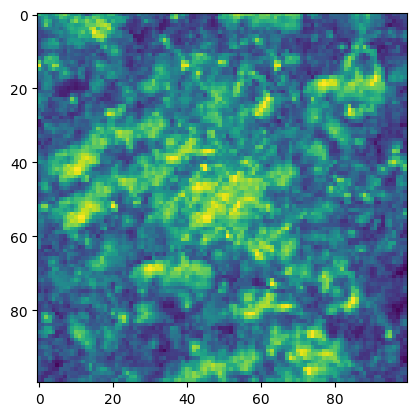

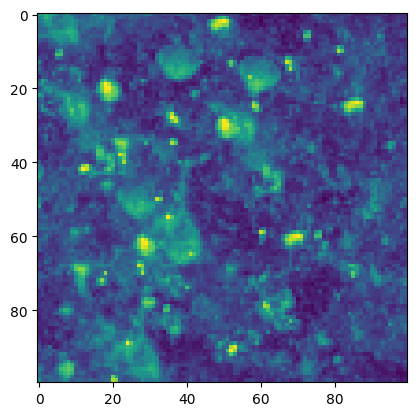

[ 0. 16. 14.]


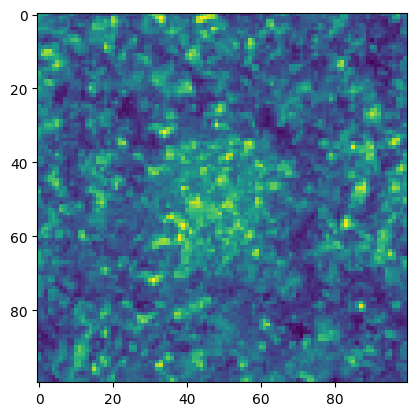

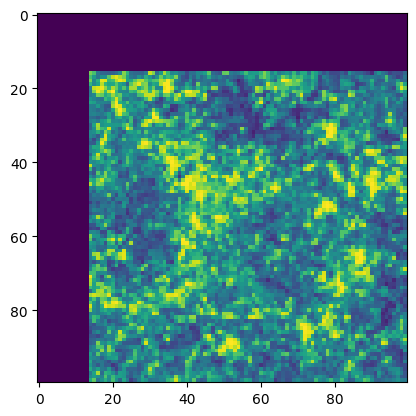

<Figure size 640x480 with 0 Axes>

In [30]:
import glob
import scipy
import skimage

pros = glob.glob("/Users/amulya/Desktop/Buenrostro_Lab/intranuclear-structures/sample_data/*pro.npy")
for p in pros:
    pro = np.load(p)
    n = p.rstrip("_pro.npy") + "_nuc.npy"
    nuc = np.load(n)
    detected_shift, _, _ = skimage.registration.phase_cross_correlation(nuc, pro, normalization=None)
    pro_shifted = scipy.ndimage.shift(pro,detected_shift)
    print(detected_shift)
    plt.imshow(np.max(nuc,axis=0))
    plt.show()
    plt.clf()
    plt.imshow(np.max(pro_shifted,axis=0))
    plt.show()
    plt.clf()

In [ ]:
from cytoself.trainer.cytoselflite_trainer import CytoselfFullTrainer

model_args = {
    'input_shape': (2, 100, 100),
    'emb_shapes': ((25, 25), (4, 4)),
    'output_shape': (2, 100, 100),
    'fc_output_idx': [2],
    'vq_args': {'num_embeddings': 512, 'embedding_dim': 64},
    'vq_args': {'num_embeddings': 512},
    'num_class': len(datamanager.unique_labels),
    'fc_input_type': 'vqvec',
}
train_args = {
    'lr': 1e-3,
    'max_epoch': 1,
    'reducelr_patience': 3,
    'reducelr_increment': 0.1,
    'earlystop_patience': 6,
}
trainer = CytoselfFullTrainer(train_args, homepath='demo_output', model_args=model_args)
trainer.fit(datamanager, tensorboard_path='tb_logs')

In [ ]:
from cytoself.analysis.analysis_opencell import AnalysisOpenCell

analysis = AnalysisOpenCell(datamanager, trainer)
umap_data = analysis.plot_umap_of_embedding_vector(
    data_loader=datamanager.test_loader,
    group_col=2,
    output_layer=f'{model_args["fc_input_type"]}2',
    title=f'UMAP {model_args["fc_input_type"]}2',
    xlabel='UMAP1',
    ylabel='UMAP2',
    s=0.3,
    alpha=0.5,
    show_legend=True,
)

# embeddings

In [103]:
import scipy
import umap
import numpy as np
import pandas as pd
import glob

### UMAP project embeddings

In [116]:
cytoself_embeddings_test = np.load("Y:\\users\\Amulya\\test_vqvec2_flat.npy")
labels_test = pd.read_csv("C:\\Users\\amulya\\Documents\\intranuclear-structures\\test_label_nucenter.csv")


# umap-project and save
# projected_embeddings = reducer.fit_transform(cytoself_embeddings)
# np.save("C:\\Users\\amulya\\Downloads\\3umap_projected_embeddings_cytoself_test.npy", projected_embeddings)

In [120]:
def filter_embeddings (labels: np.ndarray, embeddings: np.ndarray, localizations: list) -> (np.ndarray, pd.DataFrame):
    is_loc = [any([y in str(x) for y in localizations]) for x in labels['loc_grade1']]
    loc_labels = labels.loc[is_loc]
    print(np.where(is_loc))
    return embeddings[np.where(is_loc)[0]], loc_labels

def reduce_save_embeddings (embeddings: np.ndarray, title: str, dim: int = 3) -> np.ndarray:
    reducer = umap.UMAP(n_components=dim)
    proj_emb = reducer.fit_transform(embeddings)
    np.save(f"C:\\Users\\amulya\\Downloads\\{title}_{dim}umap_projected_embeddings_cytoself_test.npy", proj_emb)
    return proj_emb

#### chromatin/intranuclear proteins only

In [121]:
chrom_intranuclear_embeddings, chrom_intranuclear_labels = filter_embeddings(labels_test, cytoself_embeddings_test, ["chrom","nuc"])
chrom_intranuclear_projected_embeddings = reduce_save_embeddings(chrom_intranuclear_embeddings, "chrom_intranuclear,", dim=2)

(array([     2,      3,      4, ..., 114802, 114803, 114804], dtype=int64),)


#### chromatin only

In [122]:
chromatin_embeddings, chromatin_labels = filter_embeddings(labels_test, cytoself_embeddings_test, ["chromatin"])
chromatin_projected_embeddings = reduce_save_embeddings(chromatin_embeddings, "chromatin", dim=2)

(array([    57,     75,     98, ..., 114730, 114765, 114803], dtype=int64),)


# create dataset from all labels

In [100]:
def create_image_dataset  (labels: np.ndarray, localizations: list, images_path: str = "Y:\\users\\Amulya\\opencell_full_data") -> np.ndarray:
    is_loc = [any([y in str(x) for y in ["chromatin"]]) for x in labels['loc_grade1']]
    locations = np.where(is_loc)[0]
    curr_img_count = 0
    extracted_images = []
    for img in glob.glob(f"{images_path}\\image_*.npy"):
        print(img)
        # load in data
        img_data = np.load(img)
        # update count
        print(np.shape(img_data))
        num_img = np.shape(img_data)[0]
        # todo one off
        locs_to_use = locations[locations >= curr_img_count]
        locs_to_use = locs_to_use[locs_to_use <= curr_img_count + num_img - 1]
        # get relevant images
        print(locs_to_use)
        extracted_images.append(img_data[locs_to_use - curr_img_count])
        print(np.shape(img_data[locs_to_use - curr_img_count]))
        curr_img_count += num_img
        print(curr_img_count)
        # add to dataset
        # delete loaded data
        del img_data
    return np.vstack(extracted_images)

In [101]:
chromatin_images = create_image_dataset(["chromatin"])

Y:\users\Amulya\opencell_full_data\image_data00.npy
(134304, 100, 100, 4)
[]
(0, 100, 100, 4)
134304
Y:\users\Amulya\opencell_full_data\image_data01.npy
(113780, 100, 100, 4)
[162245 162246 162247 162248 162249 162250 162251 162252 162253 162254
 162255 162256 162257 162258 162259 162260 162261 162262 162263 162264
 162265 162266 162267 162268 162269 162270 162271 162272 162273 162274
 162275 162276 162277 162278 162279 162280 162281 162282 162283 162284
 162285 162286 162287 162288 162289 162290 162291 162292 162293 162294
 162295 162296 162297 162298 162299 162300 162301 162302 162303 162304
 162305 162306 162307 162308 162309 162310 162311 162312 162313 162314
 162315 162316 162317 162318 162319 162320 162321 162322 162323 162324
 162325 162326 162327 162328 162329 162330 162331 162332 162333 162334
 162335 162336 162337 162338 162339 162340 162341 162342 162343 162344
 162345 162346 162347 162348 162349 162350 162351 162352 162353 162354
 162355 162356 162357 162358 162359 162360 1

In [102]:
np.save("chromatin_images.npy", chromatin_images)

### visualize UMAP projection of embeddings

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipyvolume as ipv
import numpy as np

In [7]:
projected_embeddings = np.load("C:\\Users\\amulya\\Downloads\\3umap_projected_embeddings_cytoself_test.npy")
labeled_projected_embeddings = pd.concat([pd.DataFrame(projected_embeddings),labels.loc_grade1],axis=1,ignore_index=True)
unique_labels = list(np.unique([str(x).split(";")[0] for x in labels.loc_grade1]))

In [9]:
cmap = plt.get_cmap("rainbow")
c = [unique_labels.index(str(x).split(";")[0])/len(unique_labels) for x in labels.loc_grade1]
color = cmap(c)

NameError: name 'plt' is not defined

In [165]:
colors = ['aqua','blue','green','cyan','lime']
def visualize_umap (projected_embeddings, labels):
    dims = np.shape(projected_embeddings)[1]
    labeled_projected_embeddings = pd.concat([pd.DataFrame(projected_embeddings),labels.loc_grade1.reset_index()],axis=1)
    unique_labels = list(np.unique([str(x).split(";")[0] for x in labels.loc_grade1]))
    if dims == 2:
        fig = plt.figure()
        print(unique_labels)
        print(labeled_projected_embeddings)
        for l in unique_labels:
            print(l)
            l_prot = labeled_projected_embeddings[labeled_projected_embeddings.loc[:,"loc_grade1"]==l].reset_index()
            print(len(l_prot))
            if len(l_prot) <= 0:
                continue
            #print(l_prot)
            c = unique_labels.index(str(l).split(";")[0]) % len(colors)
            sns.scatterplot(x=l_prot.iloc[:,1],y=l_prot.iloc[:,2],c=colors[c],label=l,ax=fig.gca())
    elif dims == 3:
        ipv.clear()
        ipv.pylab.style.box_off()
        #ipv.pylab.style.axes_off()
        for l in unique_labels:
            l_prot = labeled_projected_embeddings[labeled_projected_embeddings.loc[:,"loc_grade1"]==l].reset_index()
            if len(l_prot) <= 0:
                continue
            #print(l_prot)
            c = unique_labels.index(str(l).split(";")[0]) % len(colors)
            ipv.pylab.scatter(x=l_prot.iloc[:,1],y=l_prot.iloc[:,2],z=l_prot.iloc[:,3],color=colors[c],description=l, description_color=colors[c],size=3)
        #ipv.pylab.xlim(np.min(projected_embeddings[:,0]),np.max(projected_embeddings[:,0]))
        #ipv.pylab.ylim(np.min(projected_embeddings[:,1]),np.max(projected_embeddings[:,1])
        ipv.pylab.xyzlim(np.min(projected_embeddings),np.max(projected_embeddings))
        ipv.squarelim()
        #import ipywidgets as widgets
        ipv.show()

In [166]:
chromatin_labels.loc_grade1

57                    chromatin
75                    chromatin
98                    chromatin
113       chromatin;nucleoplasm
181       chromatin;nucleoplasm
                  ...          
114695                chromatin
114717                chromatin
114730                chromatin
114765                chromatin
114803                chromatin
Name: loc_grade1, Length: 5583, dtype: object

['chromatin', 'nuclear_punctae', 'nucleoplasm']
              0          1   index             loc_grade1
0     -3.392992  -3.948685      57              chromatin
1     -1.479519   7.290819      75              chromatin
2     12.711661   5.845094      98              chromatin
3      2.420524  -3.459383     113  chromatin;nucleoplasm
4      1.356837   0.544757     181  chromatin;nucleoplasm
...         ...        ...     ...                    ...
5578  -3.256092  -3.474325  114695              chromatin
5579  -0.927006   8.477901  114717              chromatin
5580  13.452497  10.683920  114730              chromatin
5581  13.383566   8.088250  114765              chromatin
5582   0.608070  12.238545  114803              chromatin

[5583 rows x 4 columns]
chromatin
3877
nuclear_punctae
0
nucleoplasm
0


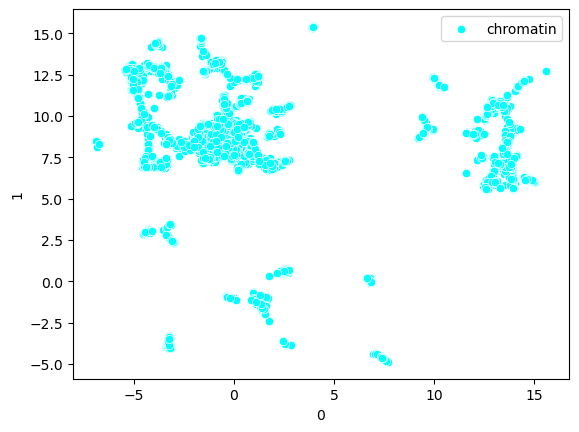

In [167]:
visualize_umap(chromatin_projected_embeddings, chromatin_labels)

In [161]:
np.shape(chromatin_projected_embeddings)

(5583, 2)

# cluster embeddings; visualize clustering

#### all proteins

In [28]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy

In [30]:
def hier_cluster_and_save(projected_embeddings: np.ndarray, title: str, method: str = "centroid") -> np.ndarray:
    Z = scipy.cluster.hierarchy.linkage(projected_embeddings,method=method)
    dim = np.shape(projected_embeddings)[1]
    np.save(f"C:\\Users\\amulya\\Downloads\\linkage_{dim}umap_{title}_projected_embeddings_cytoself_test_{method}.npy", Z)
    dn = dendrogram(Z)
    plt.show()
    return Z

In [37]:
hier_cluster_and_save(chrom_intranuclear_projected_embeddings, "chrom_intranuclear")

hier_cluster_and_save(chromatin_projected_embeddings, "chromatin")